Imports

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read data

In [160]:
data = pd.read_csv("clean_data.csv")

EAD

*For numeric data*
- Made histograms to understand distributions
- Corrplot
- Made pivot table for data aggregation
- Outliers

In [161]:
data.describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.0000,165.000000,165.000000
mean,0.787879,122.139394,3.175758,98.253939,172.404242,65.623030,53.768485,2468.018182,4.193939,118.806061,10.114667,96.690909,5135.454545,26.2000,31.769697,11612.478788
std,1.223688,35.379286,0.987430,5.233598,11.580557,1.942296,2.338016,489.894681,0.756250,32.674465,3.827846,30.945589,478.947594,6.2364,6.571023,6081.970725
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,2.000000,61.000000,7.000000,48.000000,4150.000000,15.0000,18.000000,5118.000000
25%,0.000000,94.000000,2.000000,94.500000,165.700000,64.000000,52.000000,2094.000000,4.000000,97.000000,8.700000,69.000000,4800.000000,22.0000,28.000000,7463.000000
50%,1.000000,115.000000,4.000000,96.600000,172.000000,65.400000,54.100000,2370.000000,4.000000,109.000000,9.000000,92.000000,5200.000000,26.0000,32.000000,9279.000000
75%,2.000000,150.000000,4.000000,100.400000,177.800000,66.500000,55.500000,2808.000000,4.000000,134.000000,9.400000,114.000000,5500.000000,31.0000,37.000000,15040.000000
max,3.000000,256.000000,4.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,8.000000,258.000000,23.000000,200.000000,6600.000000,49.0000,54.000000,35550.000000


In [162]:
# split numeric columns
data.describe().columns

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [163]:
# look at numeric and categorical values separately 
cat_data = data[['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 
                 'engine-location', 'engine-type', 'fuel-system']]
num_data = data[['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'compression-ratio', 'horsepower', 'peak-rpm',
       'city-mpg', 'highway-mpg', 'price']]

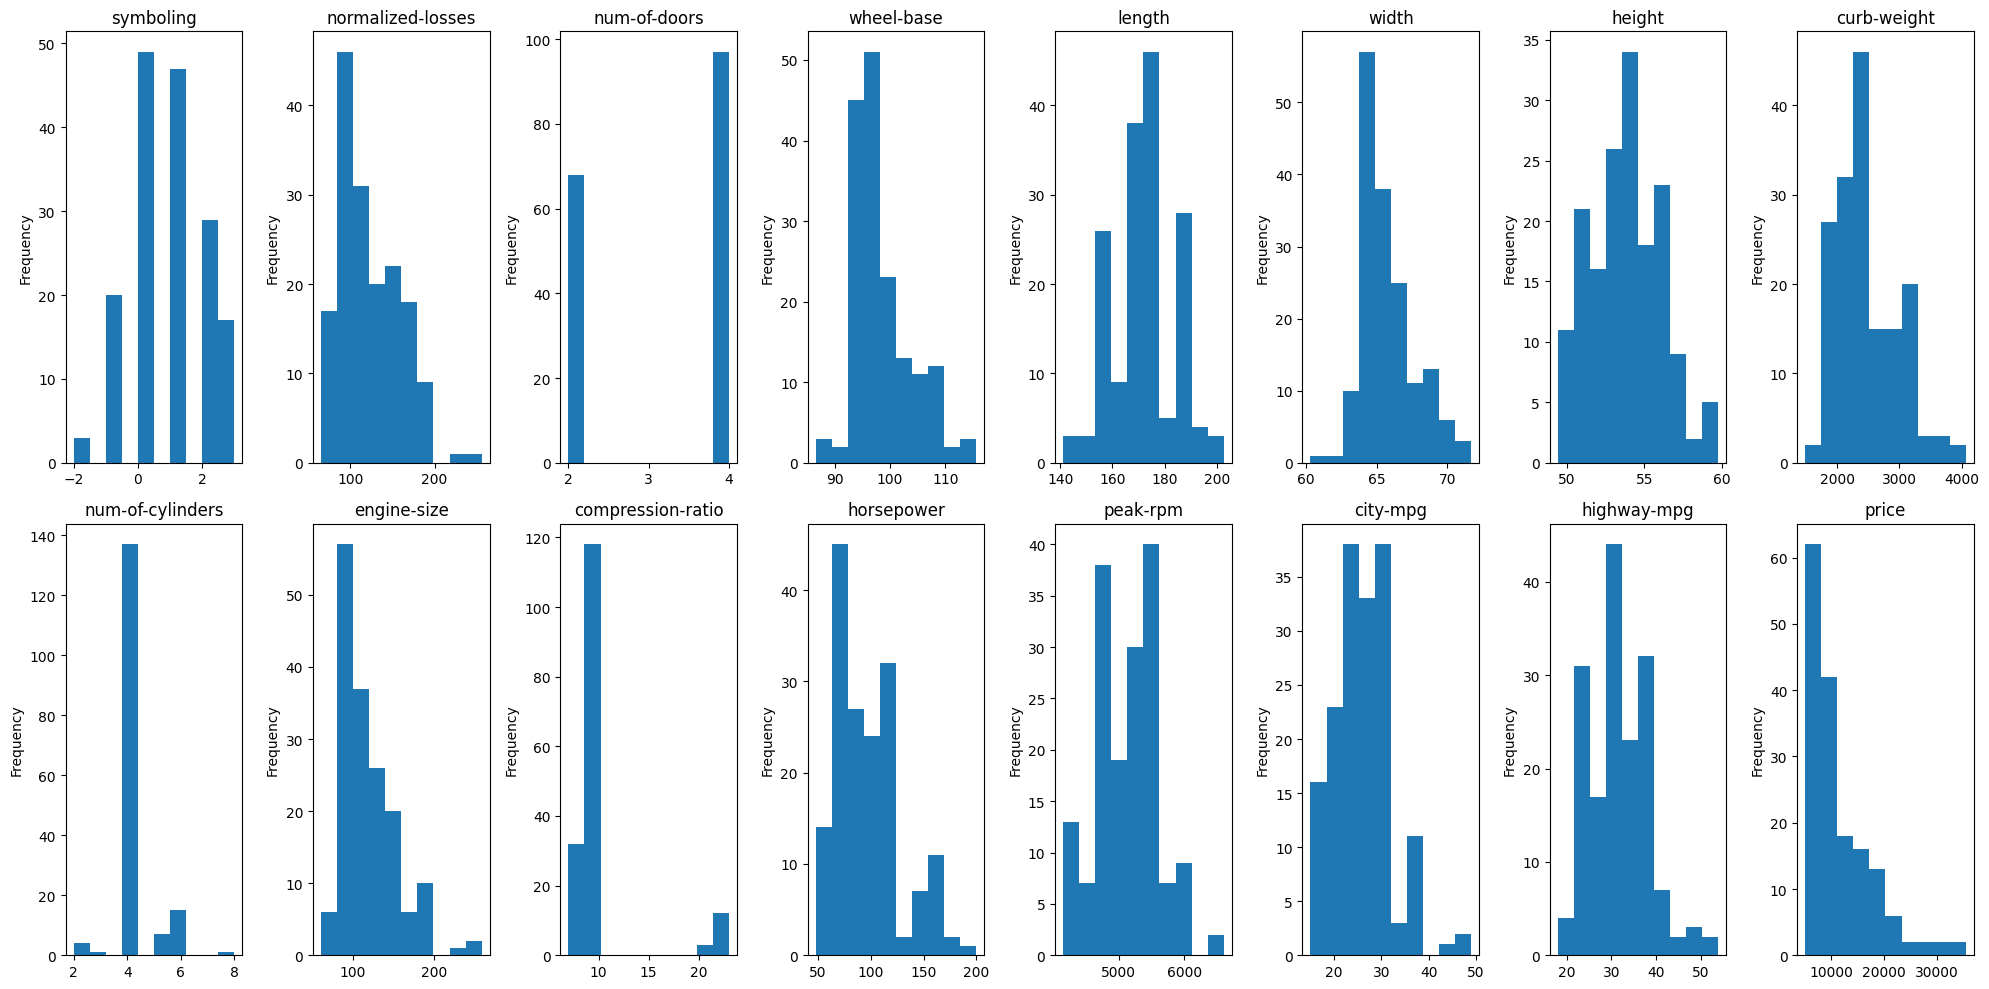

In [164]:
num_cols = len(num_data.columns)
num_rows = (num_cols // 8) 
fig, axes = plt.subplots(num_rows, 8, figsize=(20, 5*num_rows))
for i, col in enumerate(num_data.columns):
    ax = axes[i // 8, i % 8] 
    ax.hist(num_data[col])
    ax.set_title(col)
    ax.set_ylabel('Frequency')

for i in range(num_cols, num_rows*8):
    axes[i // 8, i % 8].axis('off')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation')

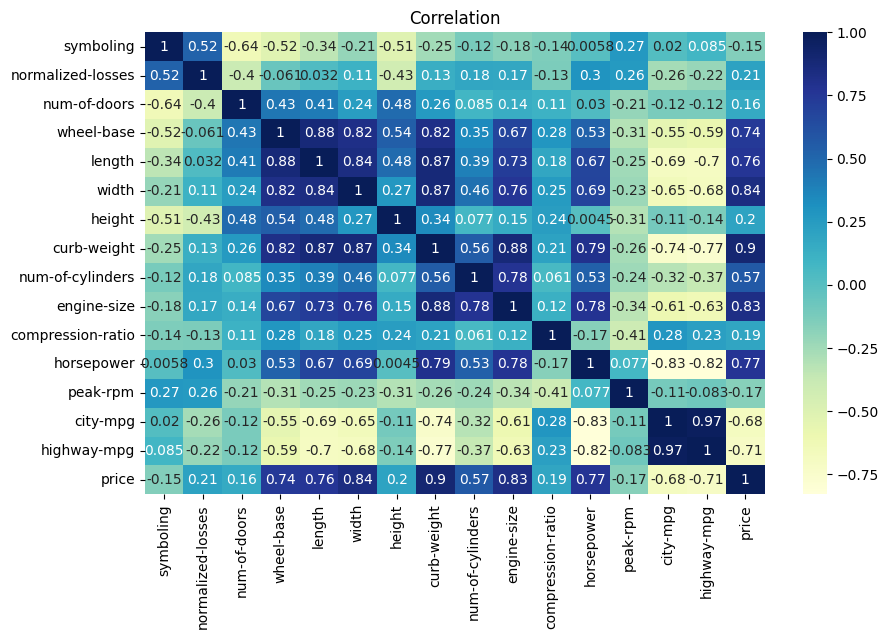

In [165]:
num_data_corr = num_data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(num_data.corr(), cmap='YlGnBu', annot=True)
plt.title('Correlation')

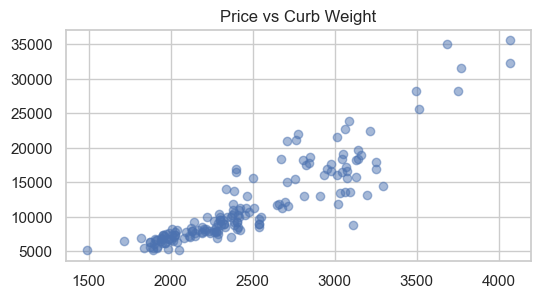

In [204]:
# scatter Plot
plt.figure(figsize=(6, 3))
plt.scatter(data['curb-weight'], data['price'], alpha=0.5, cmap='nipy_spectral')
plt.title('Price vs Curb Weight')
plt.show()

In [166]:
num_data_corr

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.524765,-0.640124,-0.519766,-0.337882,-0.213433,-0.513855,-0.250689,-0.120000,-0.176260,-0.139375,0.005826,0.267286,0.019975,0.084886,-0.152433
normalized-losses,0.524765,1.000000,-0.397091,-0.061266,0.032103,0.111696,-0.433196,0.128695,0.181530,0.174458,-0.134458,0.299540,0.260542,-0.262723,-0.215748,0.208709
num-of-doors,-0.640124,-0.397091,1.000000,0.432008,0.408021,0.242048,0.480472,0.261613,0.084724,0.136003,0.112207,0.029925,-0.211168,-0.121595,-0.123410,0.160676
wheel-base,-0.519766,-0.061266,0.432008,1.000000,0.876238,0.817072,0.537727,0.818768,0.345979,0.671808,0.278718,0.525500,-0.310350,-0.548031,-0.585508,0.742203
length,-0.337882,0.032103,0.408021,0.876238,1.000000,0.842471,0.482100,0.873720,0.387852,0.725017,0.179059,0.671886,-0.248768,-0.691073,-0.698887,0.763670
width,-0.213433,0.111696,0.242048,0.817072,0.842471,1.000000,0.274859,0.871458,0.462292,0.757257,0.250942,0.685611,-0.230494,-0.652024,-0.682871,0.839954
height,-0.513855,-0.433196,0.480472,0.537727,0.482100,0.274859,1.000000,0.338288,0.076933,0.153641,0.237162,0.004458,-0.308724,-0.106413,-0.140063,0.203867
curb-weight,-0.250689,0.128695,0.261613,0.818768,0.873720,0.871458,0.338288,1.000000,0.556087,0.876251,0.208576,0.794141,-0.262741,-0.737322,-0.769980,0.898926
num-of-cylinders,-0.120000,0.181530,0.084724,0.345979,0.387852,0.462292,0.076933,0.556087,1.000000,0.777358,0.060728,0.530192,-0.241316,-0.319857,-0.366430,0.569343
engine-size,-0.176260,0.174458,0.136003,0.671808,0.725017,0.757257,0.153641,0.876251,0.777358,1.000000,0.124250,0.776800,-0.335464,-0.606390,-0.633155,0.827069


In [167]:
# strong correlations with price column
num_data_corr["price"][((num_data_corr["price"] > 0.6) & (num_data_corr["price"] < 1)) | ((num_data_corr["price"] < -0.6) & (num_data_corr["price"] > -1))]

wheel-base     0.742203
length         0.763670
width          0.839954
curb-weight    0.898926
engine-size    0.827069
horsepower     0.769257
city-mpg      -0.682537
highway-mpg   -0.713661
Name: price, dtype: float64

In [168]:
# strong correlations
strong_correlations = num_data_corr[((num_data_corr > 0.6) & (num_data_corr < 1)) | ((num_data_corr < -0.6) & (num_data_corr > -1))]
strong_correlations

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,NaN,NaN,-0.640124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
normalized-losses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num-of-doors,-0.640124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheel-base,NaN,NaN,NaN,NaN,0.876238,0.817072,NaN,0.818768,NaN,0.671808,NaN,NaN,NaN,NaN,NaN,0.742203
length,NaN,NaN,NaN,0.876238,NaN,0.842471,NaN,0.873720,NaN,0.725017,NaN,0.671886,NaN,-0.691073,-0.698887,0.763670
width,NaN,NaN,NaN,0.817072,0.842471,NaN,NaN,0.871458,NaN,0.757257,NaN,0.685611,NaN,-0.652024,-0.682871,0.839954
height,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
curb-weight,NaN,NaN,NaN,0.818768,0.873720,0.871458,NaN,NaN,NaN,0.876251,NaN,0.794141,NaN,-0.737322,-0.769980,0.898926
num-of-cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.777358,NaN,NaN,NaN,NaN,NaN,NaN
engine-size,NaN,NaN,NaN,0.671808,0.725017,0.757257,NaN,0.876251,0.777358,NaN,NaN,0.776800,NaN,-0.606390,-0.633155,0.827069


In [169]:
# Compare makes across some numeric data
pd.pivot_table(data, index = 'make', values = ['symboling', 'normalized-losses', 'engine-size',
                                               'city-mpg', 'highway-mpg', 'price'])

,city-mpg,engine-size,highway-mpg,normalized-losses,price,symboling
make,,,,,,
audi,19.500000,128.000000,24.250000,161.000000,18246.250000,1.500000
bmw,22.000000,136.000000,28.500000,190.000000,18857.500000,0.500000
chevrolet,41.000000,80.333333,46.333333,100.000000,6007.000000,1.000000
dodge,28.000000,102.666667,34.111111,133.444444,7875.444444,1.000000
honda,30.384615,99.307692,35.461538,103.000000,8184.692308,0.615385
jaguar,15.000000,258.000000,19.000000,145.000000,33900.000000,0.000000
mazda,24.666667,99.666667,30.800000,123.933333,10130.666667,1.266667
mercedes-benz,20.800000,193.200000,23.600000,102.800000,29726.400000,0.000000
mitsubishi,26.700000,107.000000,33.300000,146.200000,7813.000000,1.500000


- the brands that have the most efficiency in an urban environment according to city-mpg compared to the others are 
chevrolet, honda and volkswagem
- the brands that have the largest engine size are jaguar, mercedes-benz, and porsche
- the brands that have the most efficiency on the road according to highway-mpg compared to the others are 
chevrolet, volkswagem, and plymouth
- the brands that have the biggest losses per year are bmw, porsche, peugot, and audi
- the brand classified as safest is volvo and the brand that has a higher risk factor is porsche


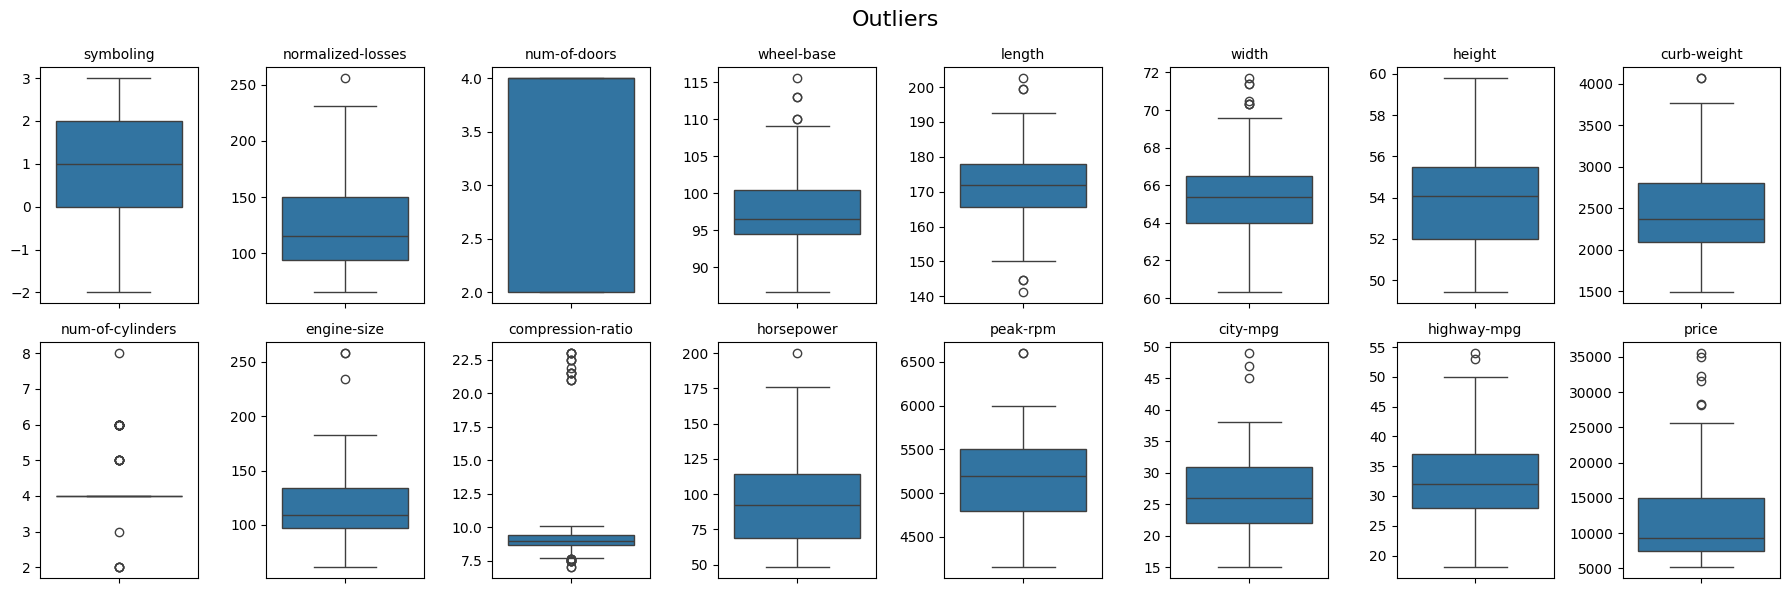

In [170]:
# Outliers Detection
num_cols = len(num_data.columns)
num_rows = -(-num_cols // 8)  

fig, axes = plt.subplots(num_rows, 8, figsize=(18, 3*num_rows))
fig.suptitle('Outliers', fontsize=16)  

for i, col in enumerate(num_data.columns):
    ax = axes[i // 8, i % 8]

    sns.boxplot(y=num_data[col], ax=ax)  
    ax.set_title(col, fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')  

for i in range(num_cols, num_rows * 8):
    axes[i // 8, i % 8].axis('off')

plt.tight_layout()
plt.show()

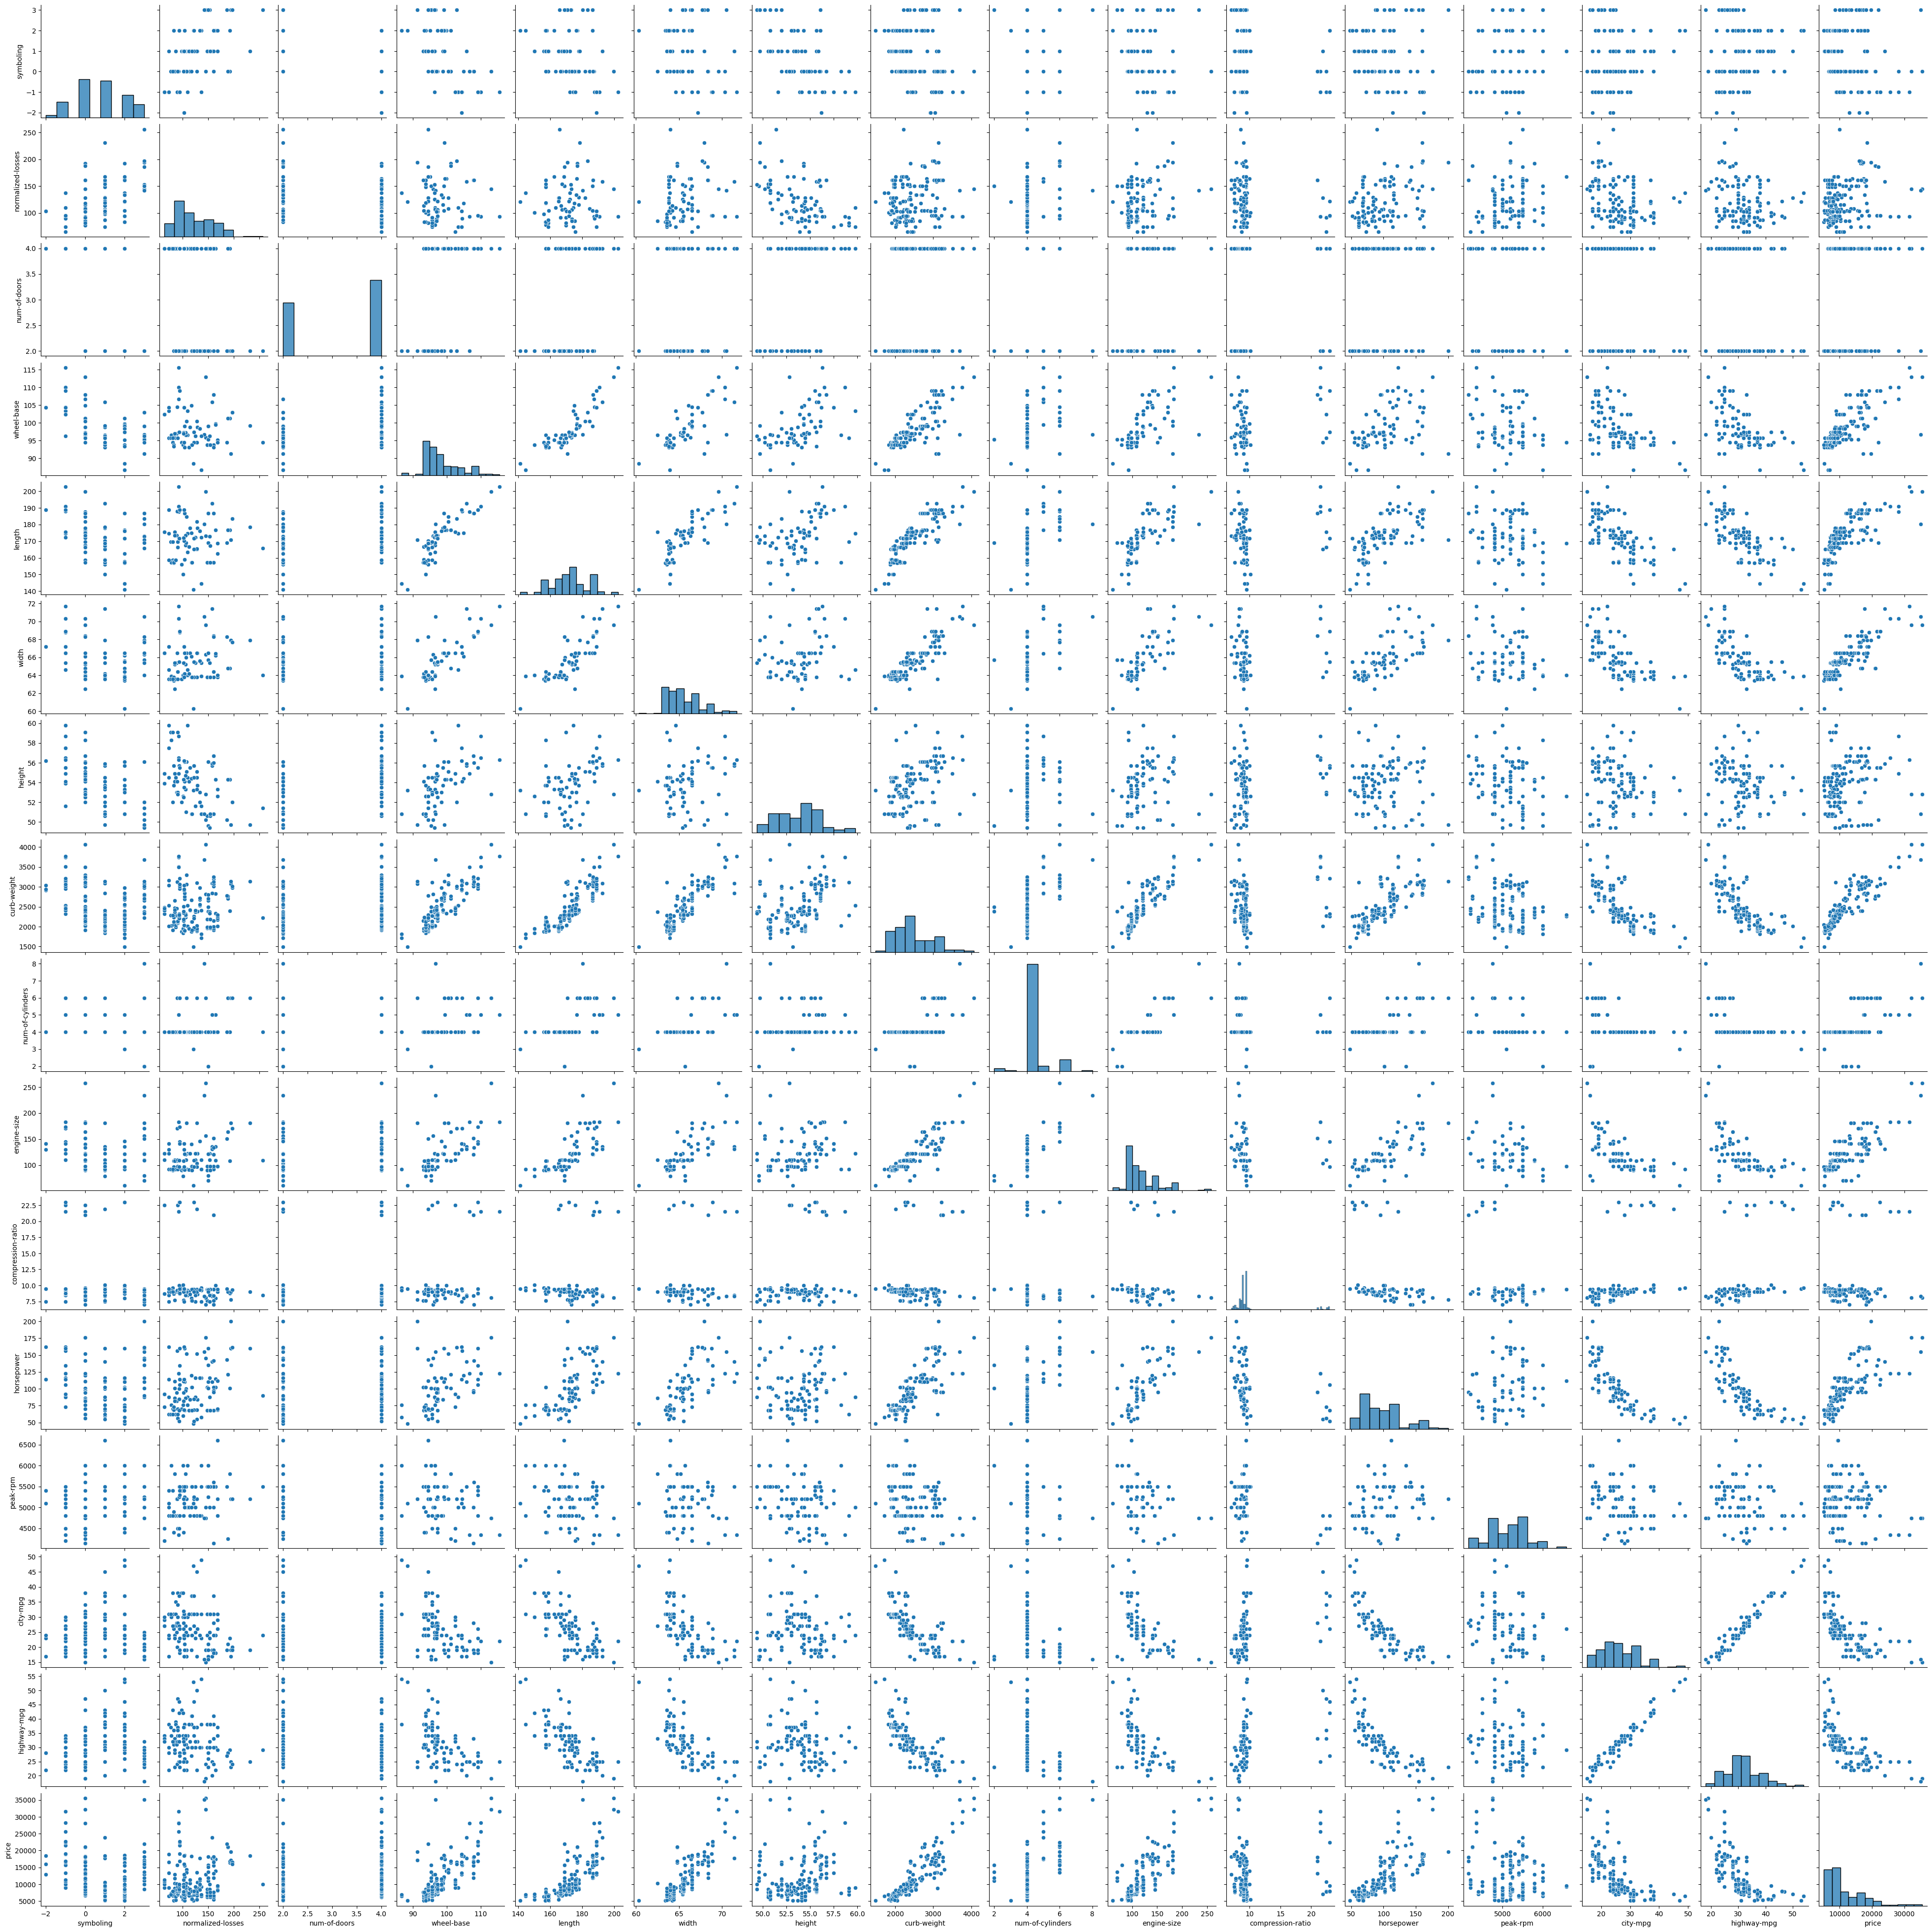

In [171]:
# view relationships between all numeric variables
'''
- confirms the high price positive correlations with the variables wheel-base, length, widdth, curb-weight, engine-size, 
horsepower and the hight price negative correlations with city-mpg and highway-mpg
'''
sns.pairplot(num_data)
plt.show()

*For categorical data*
- Made bar charts to understand balance of classes
- Made pivot tables to understand relationship between categorical data with prices

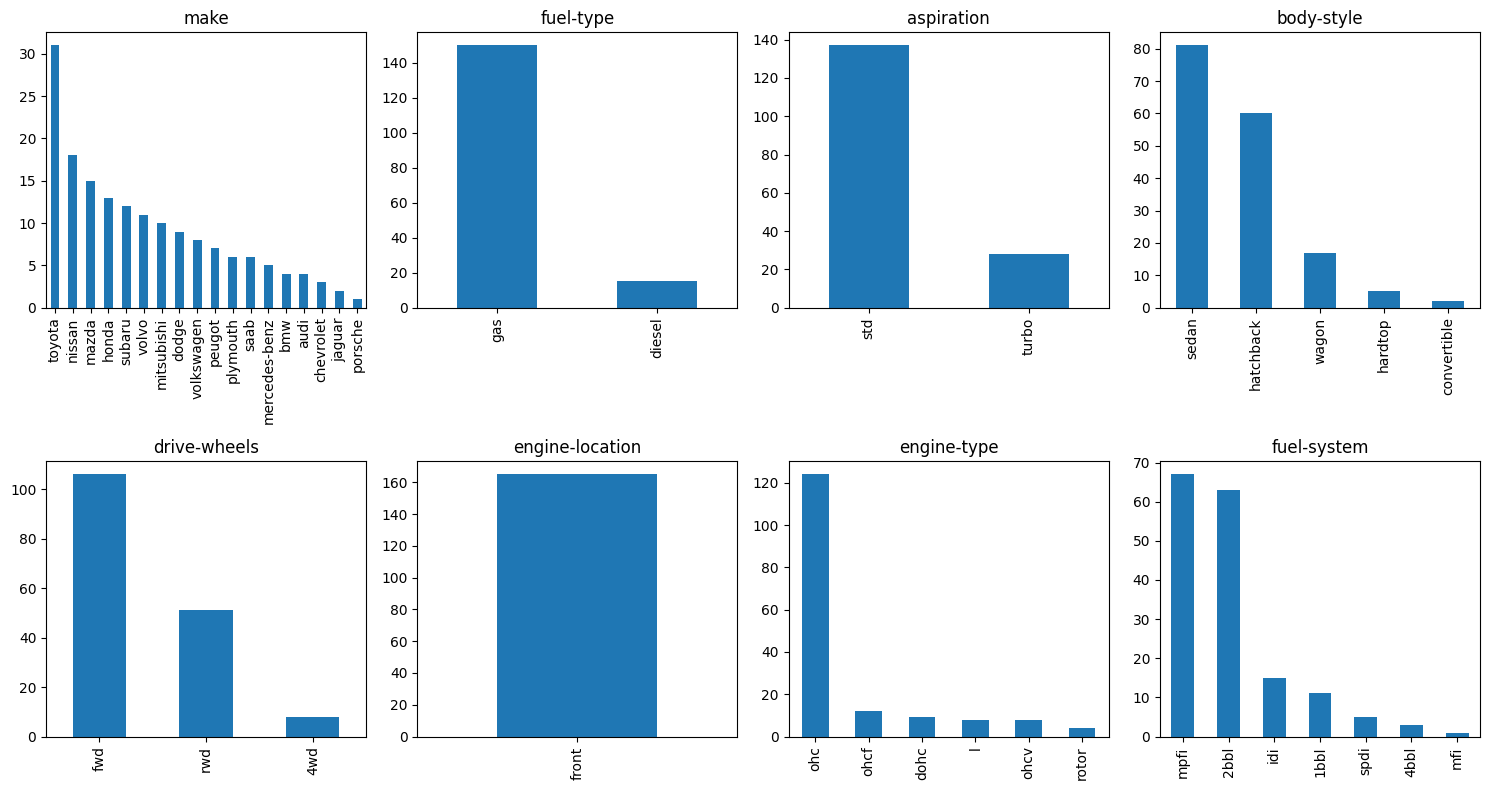

In [172]:
num_plots = len(cat_data.columns)
num_cols = 4
num_rows = - (-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))
for i, col in enumerate(cat_data.columns):
    ax = axes[i // num_cols, i % num_cols]
    value_counts = cat_data[col].value_counts()
    value_counts.plot(kind='bar', ax=ax)
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
for i in range(num_plots, num_rows * num_cols):
    axes[i // num_cols, i % num_cols].axis('off')
plt.tight_layout()
plt.show()

In [173]:
cat_pivot = pd.pivot_table(data, values='price', index=['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 
                                            'engine-location', 'engine-type', 'fuel-system'], aggfunc='mean')

In [174]:
cat_pivot.head(60)

price
make          fuel-type aspiration body-style  drive-wheels engine-location engine-type fuel-system              
audi          gas       std        sedan       4wd          front           ohc         mpfi         17450.000000
                                               fwd          front           ohc         mpfi         15830.000000
                        turbo      sedan       fwd          front           ohc         mpfi         23875.000000
bmw           gas       std        sedan       rwd          front           ohc         mpfi         18857.500000
chevrolet     gas       std        hatchback   fwd          front           l           2bbl          5151.000000
                                                                            ohc         2bbl          6295.000000
                                   sedan       fwd          front           ohc         2bbl          6575.000000
dodge         gas       std        hatchback   fwd          front           ohc         2bbl          6059.333333
                                   sedan       fwd          front           ohc         2bbl          7150.500000
                                   wagon       fwd          front           ohc         2bbl          8921.000000
                        turbo      hatchback   fwd          front           ohc         mfi          12964.000000
                                                                                        mpfi          7957.000000
                                   sedan       fwd          front           ohc         mpfi          8558.000000
honda         gas       std        hatchback   fwd          front           ohc         1bbl          7054.428571
                                   sedan       fwd          front           ohc         1bbl          8811.666667
                                                                                        2bbl         10345.000000
                                                                                        mpfi         12945.000000
                                   wagon       fwd          front           ohc         1bbl          7295.000000
jaguar        gas       std        sedan       rwd          front           dohc        mpfi         33900.000000
mazda         gas       std        hatchback   fwd          front           ohc         2bbl          8128.333333
                                               rwd          front           rotor       4bbl         12145.000000
                                                                                        mpfi         15645.000000
                                   sedan       fwd          front           ohc         2bbl          8207.500000
                                               rwd          front           ohc         mpfi         18280.000000
mercedes-benz diesel    turbo      hardtop     rwd          front           ohc         idi          28176.000000
                                   sedan       rwd          front           ohc         idi          28576.000000
                                   wagon       rwd          front           ohc         idi          28248.000000
              gas       std        convertible rwd          front           ohcv        mpfi         35056.000000
mitsubishi    gas       std        hatchback   fwd          front           ohc         2bbl          6686.500000
                                   sedan       fwd          front           ohc         2bbl          7589.000000
                                                                                        spdi          9279.000000
                        turbo      hatchback   fwd          front           ohc         spdi          8824.000000
                                   sedan       fwd          front           ohc         spdi          9279.000000
nissan        diesel    std        sedan       fwd          front           ohc         idi           7099.000000
    

In [175]:
cat_pivot.tail(30)

price
make       fuel-type aspiration body-style  drive-wheels engine-location engine-type fuel-system              
subaru     gas       std        wagon       fwd          front           ohcf        2bbl          7463.000000
                                                                                     mpfi         10198.000000
                     turbo      sedan       4wd          front           ohcf        mpfi         11259.000000
                                wagon       4wd          front           ohcf        mpfi         11694.000000
toyota     diesel    std        hatchback   fwd          front           ohc         idi           7788.000000
                                sedan       fwd          front           ohc         idi           7898.000000
                     turbo      sedan       fwd          front           ohc         idi          10698.000000
           gas       std        convertible rwd          front           ohc         mpfi         17669.000000
                                hardtop     rwd          front           ohc         mpfi          9762.333333
                                hatchback   fwd          front           ohc         2bbl          6746.000000
                                                                                     mpfi         10618.000000
                                            rwd          front           dohc        mpfi         14031.333333
                                                                         ohc         2bbl          8238.000000
                                                                                     mpfi         10769.000000
                                sedan       fwd          front           ohc         2bbl          7978.000000
                                                                                     mpfi          9923.000000
                                            rwd          front           dohc        mpfi         12494.000000
                                                                         ohc         2bbl          8058.000000
                                wagon       4wd          front           ohc         2bbl          8338.000000
                                            fwd          front           ohc         2bbl          6918.000000
volkswagen diesel    std        sedan       fwd          front           ohc         idi           7885.000000
                     turbo      sedan       fwd          front           ohc         idi           9495.000000
           gas       std        hatchback   fwd          front           ohc         mpfi          9980.000000
                                sedan       fwd          front           ohc         mpfi          8665.000000
volvo      diesel    turbo      sedan       rwd          front           ohc         idi          22470.000000
           gas       std        sedan       rwd          front           ohc         mpfi         15256.666667
                                                                         ohcv        mpfi         21485.000000
                                wagon       rwd          front           ohc         mpfi         14965.000000
                     turbo      sedan       rwd          front           ohc         mpfi         20030.000000
                                wagon       rwd          front           ohc         mpfi         18950.000000

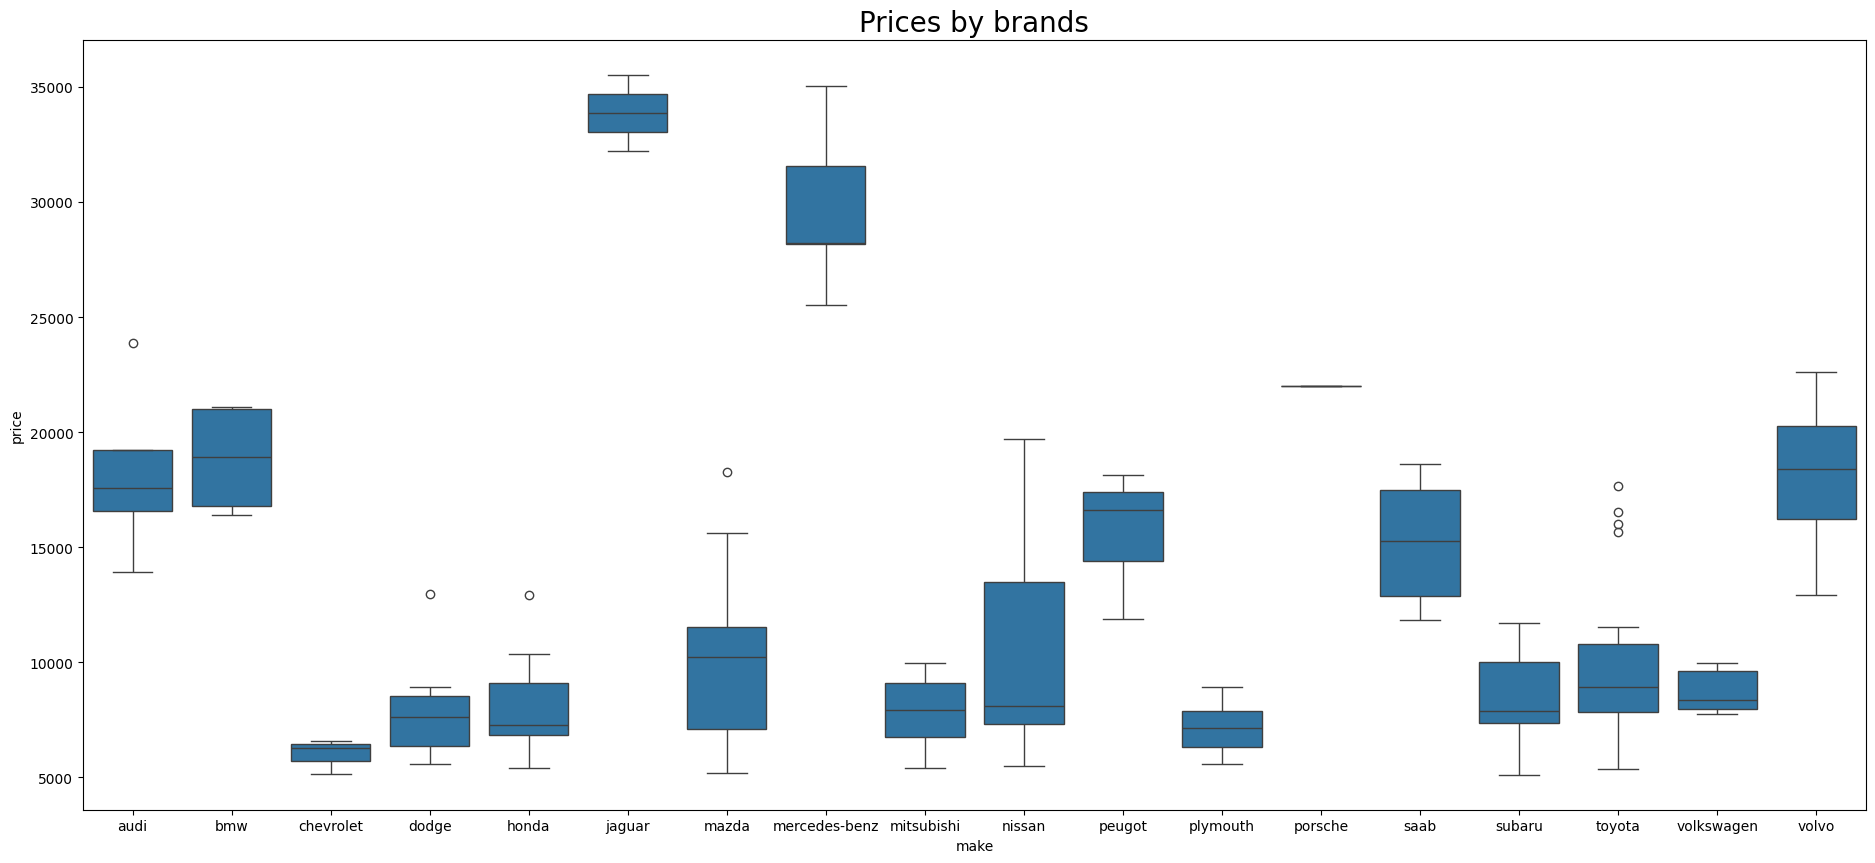

In [180]:
# visualize price behavior according to make
plt.rcParams['figure.figsize']=(23,10)
plt.title('Prices by brands', fontsize=20)
ax = sns.boxplot(x="make", y="price", data=data)

- Feature Engineering

In [176]:
# create new power-weight ratio column
data["power-weight"] = round(data["curb-weight"]/data["horsepower"],1)

- Feature selection - select the most relevant features to model

- From the categorical resources, only the engine-location column will be removed as there is only input from one category. 

- From the numerical resources through correlation analyzes and scatter plots, the curb-weight column will be used as it 
has a high correlation with the dependent variable and the created power-weight column. 
The other columns correlated with the dependent variables will not be considered to avoid multicollinearity in the model.

In [177]:
data = data[['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-type', 'fuel-system', 'curb-weight', "power-weight", "price"]]

In [178]:
data

,make,fuel-type,aspiration,body-style,drive-wheels,engine-type,fuel-system,curb-weight,power-weight,price
0,audi,gas,std,sedan,fwd,ohc,mpfi,2337,22.9,13950
1,audi,gas,std,sedan,4wd,ohc,mpfi,2824,24.6,17450
2,audi,gas,std,sedan,fwd,ohc,mpfi,2844,25.9,17710
3,audi,gas,turbo,sedan,fwd,ohc,mpfi,3086,22.0,23875
4,bmw,gas,std,sedan,rwd,ohc,mpfi,2395,23.7,16430
...,...,...,...,...,...,...,...,...,...,...
160,volvo,gas,std,sedan,rwd,ohc,mpfi,2952,25.9,16845
161,volvo,gas,turbo,sedan,rwd,ohc,mpfi,3049,19.1,19045
162,volvo,gas,std,sedan,rwd,ohcv,mpfi,3012,22.5,21485
163,volvo,diesel,turbo,sedan,rwd,ohc,idi,3217,30.3,22470


In [179]:
# save selected data to csv file
data.to_csv('selected_data.csv', index=False)